<a href="https://colab.research.google.com/github/ramrajv/Thesis/blob/main/Transhipment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Reading the csv file and putting it into 'df' object.
url = 'https://raw.githubusercontent.com/ramrajv/Thesis/main/df_merged.csv'
df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    733 non-null    int64  
 1   MMSI          733 non-null    int64  
 2   duration_max  733 non-null    float64
 3   duration_min  733 non-null    float64
 4   max_accel     733 non-null    float64
 5   min_accel     733 non-null    float64
 6   max_rot       733 non-null    float64
 7   min_rot       733 non-null    float64
 8   target        733 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 51.7 KB


In [4]:
# Putting feature variable to X
X = df.drop('target',axis=1)

# Putting response variable to y
y = df['target']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((513, 8), (220, 8))

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [9]:
# Importing required packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

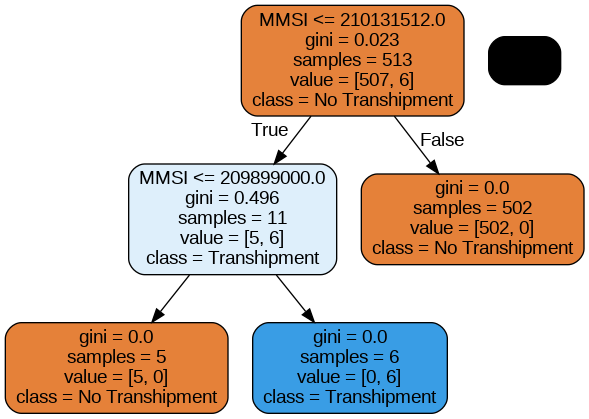

In [10]:
# plotting tree with max_depth=3
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns,
                class_names=['No Transhipment', "Transhipment"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

#### Evaluating model performance

In [11]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [13]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

1.0


array([[507,   0],
       [  0,   6]])

In [14]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

1.0


array([[218,   0],
       [  0,   2]])